In [1]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [30]:
df=pd.read_csv("Medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
df.shape

(2772, 7)

In [32]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [34]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

In [36]:
df.nunique().sort_values()

sex            2
smoker         2
region         4
children       6
age           47
bmi          548
charges     1337
dtype: int64

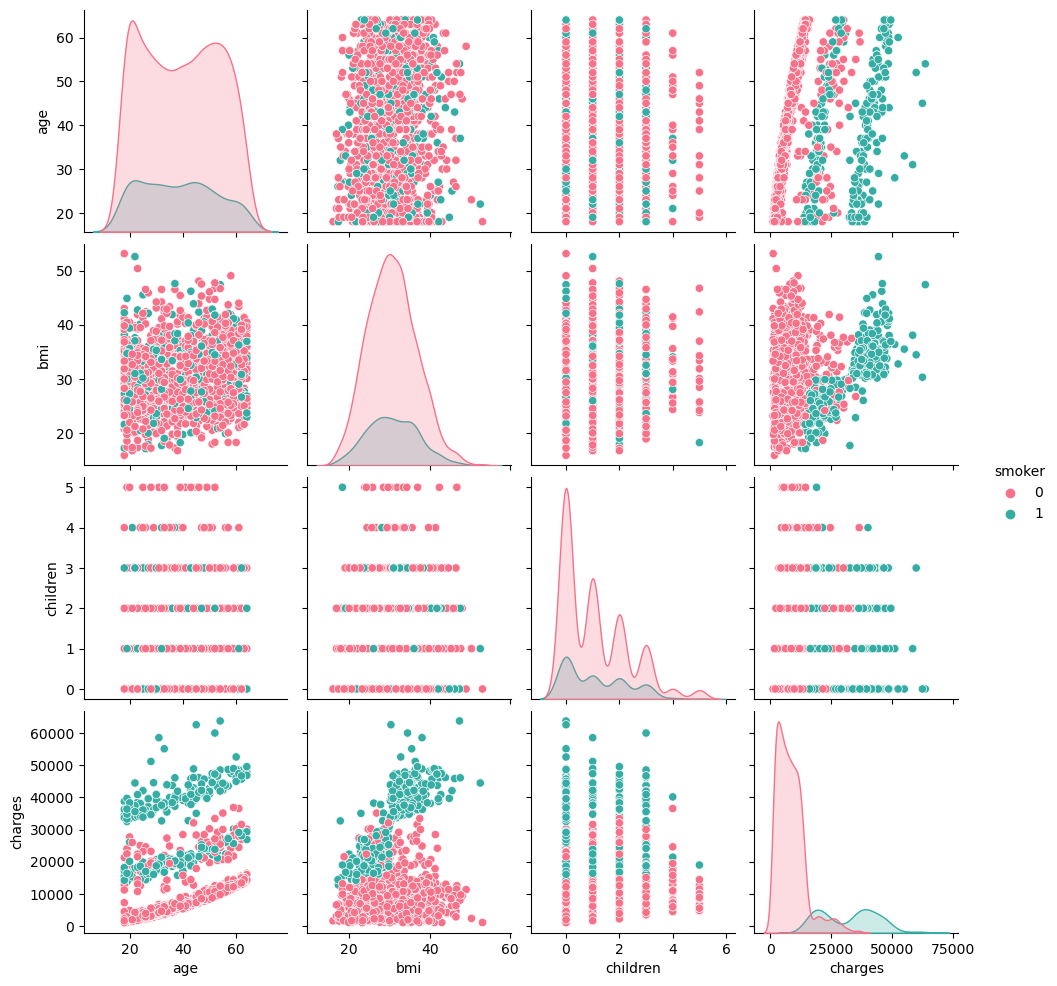

In [37]:
sns.pairplot(df, vars=["age", 'bmi','children','charges'],hue='smoker',palette="husl")
plt.show()

Text(0.5, 1.0, 'Region vs Charges')

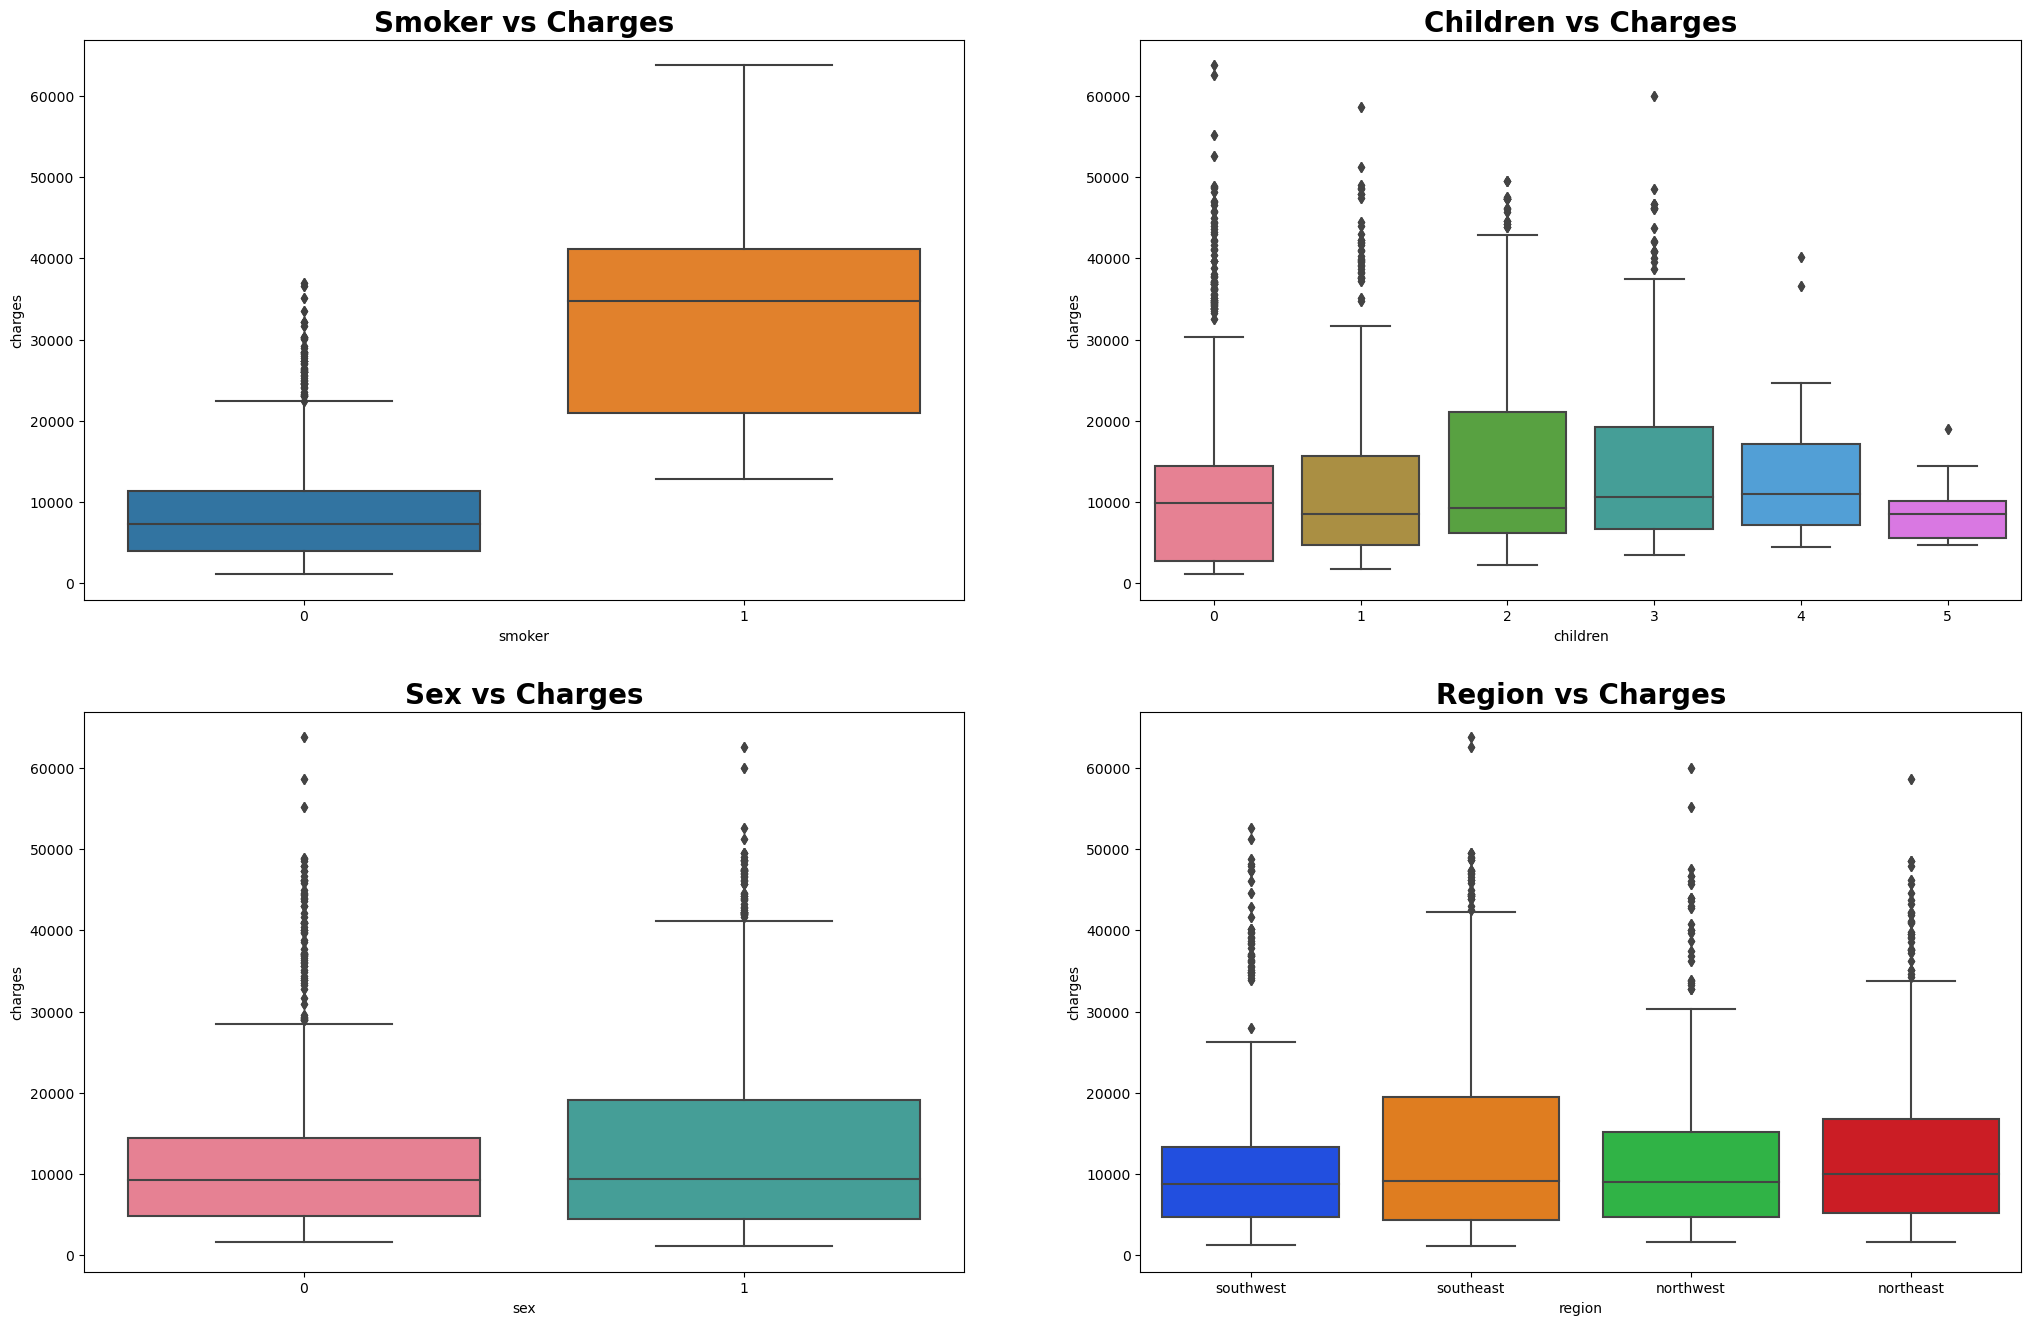

In [38]:
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.title('Smoker vs Charges',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df,palette="husl")
plt.title('Children vs Charges',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = df, palette= 'husl')
plt.title('Sex vs Charges',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'region', y = 'charges', data = df,palette="bright")
plt.title('Region vs Charges',fontweight="bold", size=20)

<Axes: xlabel='sex', ylabel='count'>

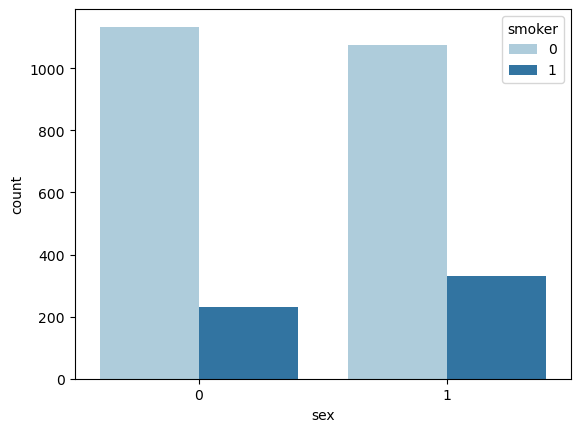

In [39]:
sns.countplot(x='sex', hue='smoker', data=df, palette='Paired')

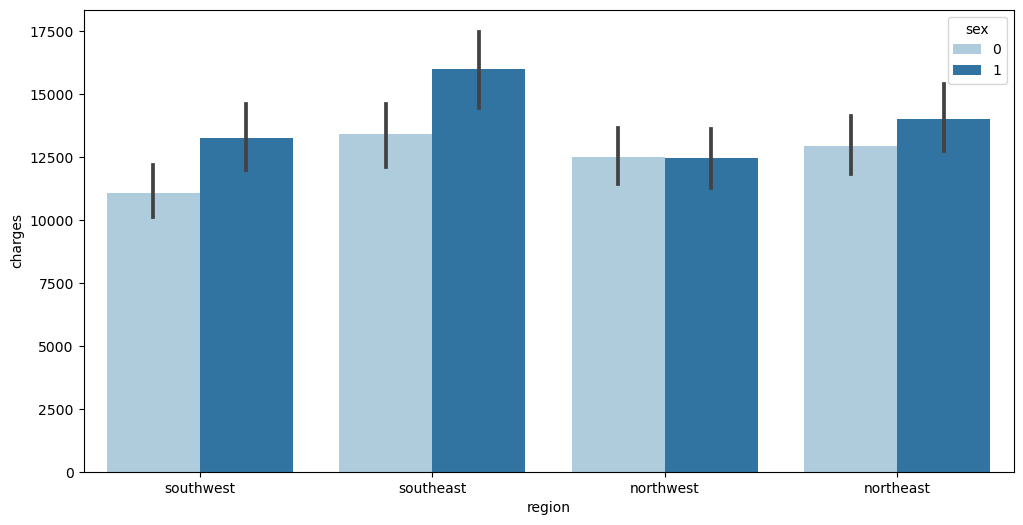

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Paired')
plt.show()


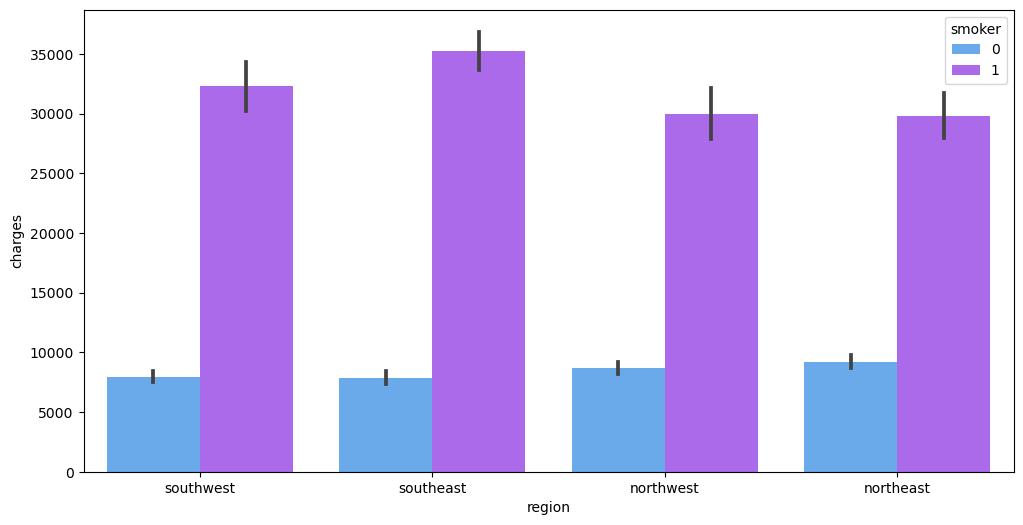

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'region', y = 'charges',hue='smoker', data=df, palette='cool')
plt.show()

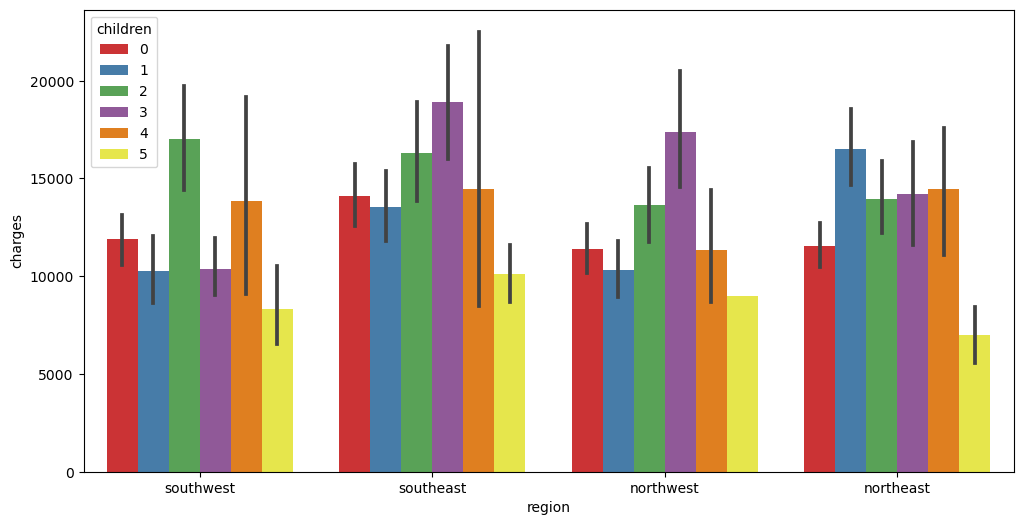

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')
plt.show()

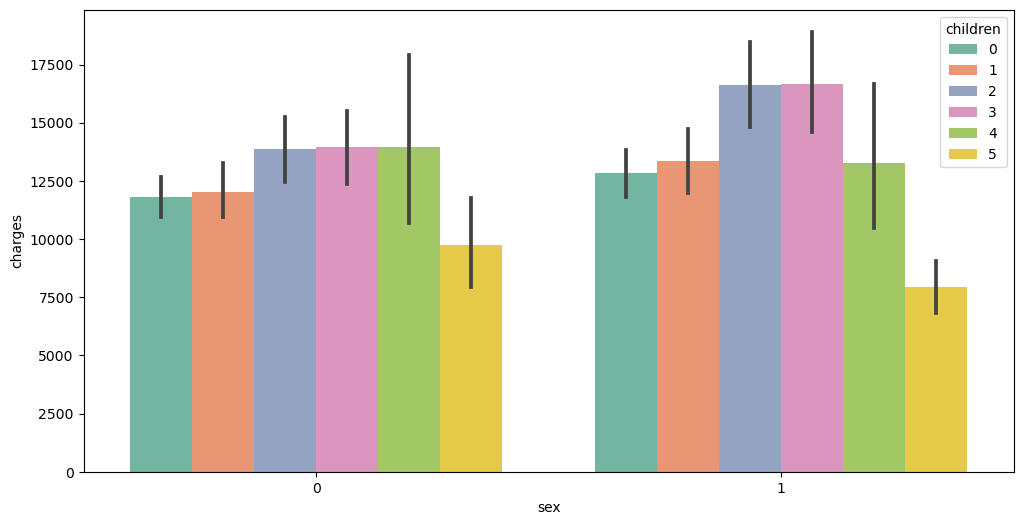

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x='sex', y='charges', hue='children', data=df, palette='Set2')
plt.show()

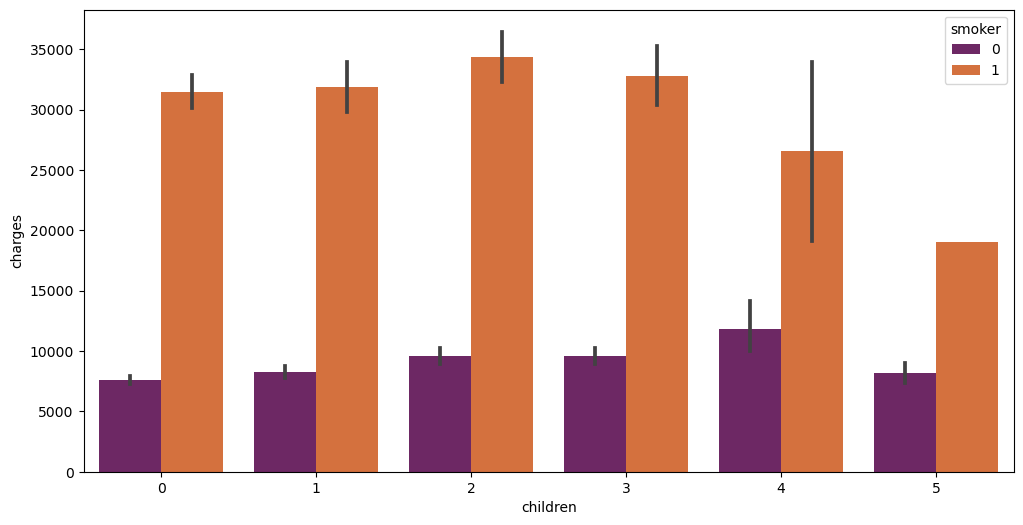

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='inferno')
plt.show()

In [45]:
df[df['sex']==0]['bmi'].mean()

30.434472913616396

In [46]:
df[df['sex']==1]['bmi'].mean()

30.960633001422472

<Axes: xlabel='age', ylabel='Density'>

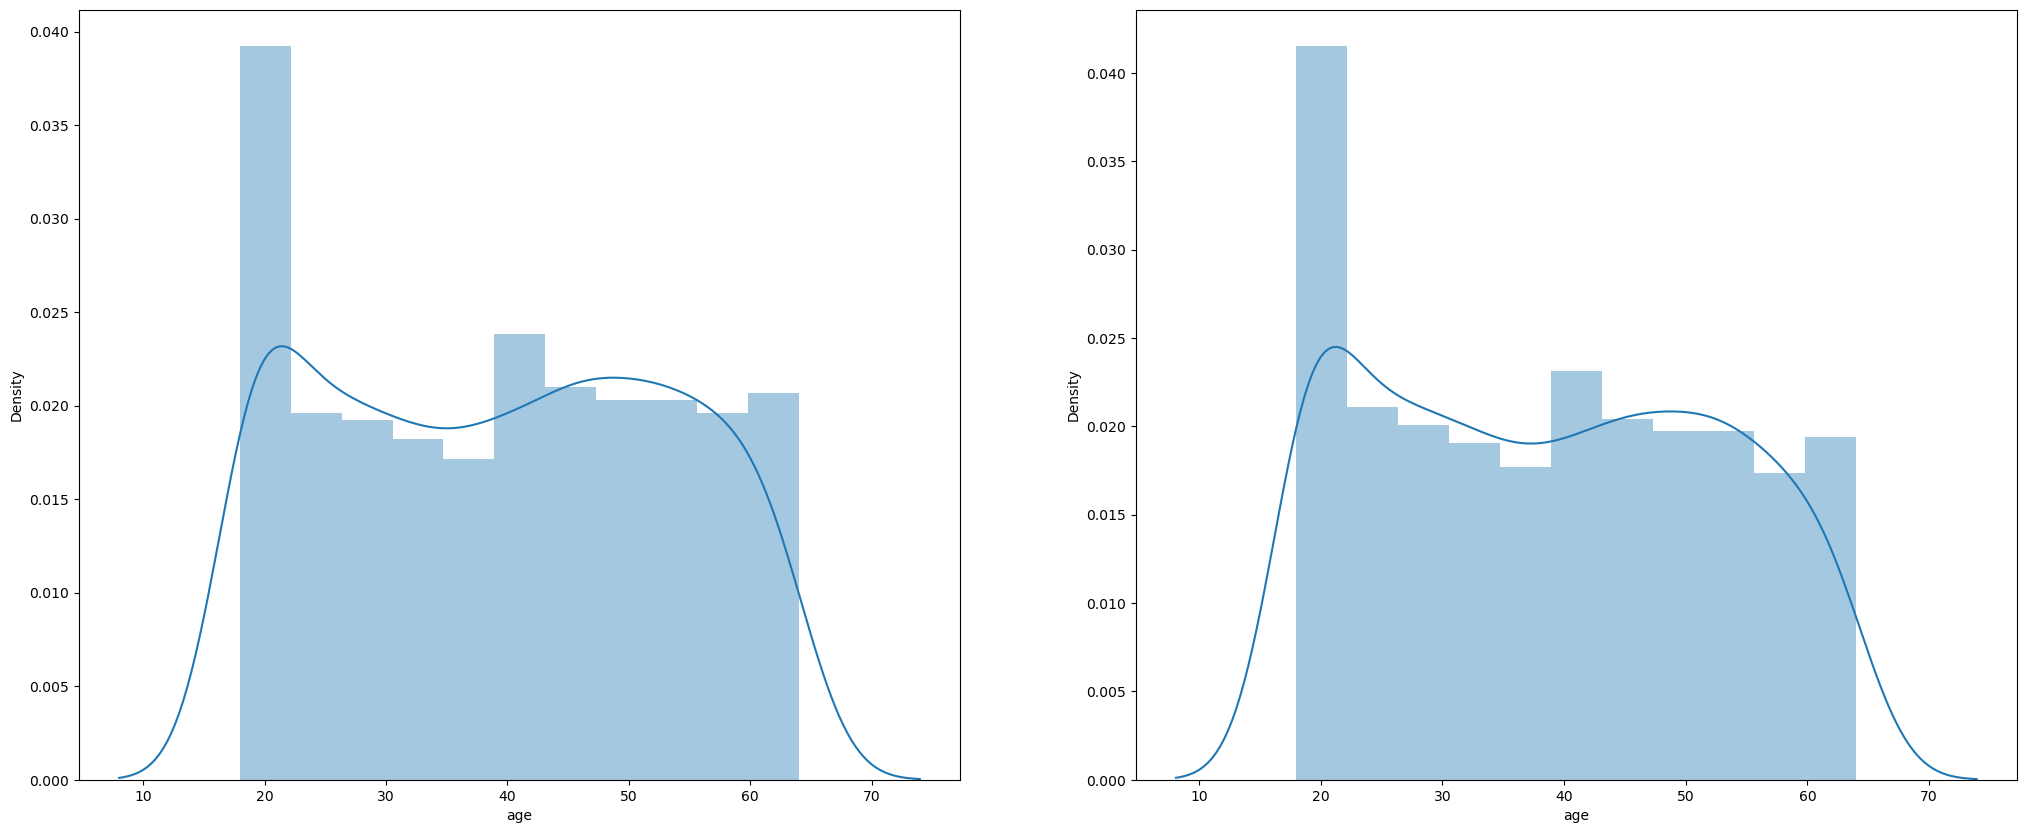

In [47]:
plt.figure(figsize=(25, 10))
plt.subplot(1,2,1)
sns.distplot(df[df['sex']==0]['age'])
plt.subplot(1,2,2)
sns.distplot(df[df['sex']==1]['age'])

In [49]:
categorical_cols = ['categorical_column1', 'categorical_column2', ...]

In [53]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [54]:
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

In [55]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [57]:
df.shape

(2772, 7)

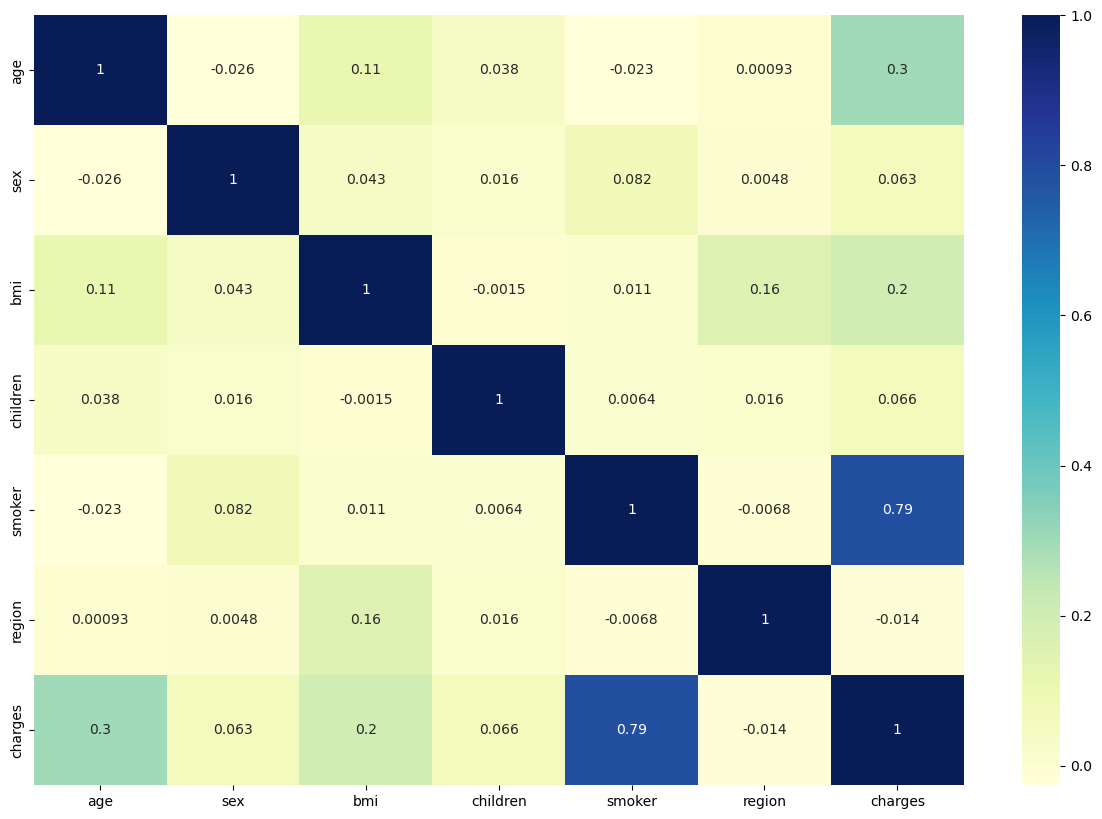

In [59]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.8,random_state = 100)

In [61]:
print(df_train.shape)
print(df_test.shape)

(2217, 7)
(555, 7)


In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['age','bmi','charges','children','region']

#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,age,sex,bmi,children,smoker,region,charges
1778,0.652174,1,0.416599,0.2,0,0.000000,0.125177
956,0.782609,1,0.399247,0.2,1,0.666667,0.652491
1705,0.304348,1,0.575061,0.2,0,0.000000,0.056597
526,0.021739,0,0.393597,0.4,0,0.333333,0.366135
1222,0.695652,1,0.251278,0.0,0,0.666667,0.116855


In [64]:
#Divide the data into X and y
y_train = df_train.pop('charges')
X_train = df_train

In [65]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

In [66]:
lm=LinearRegression()

In [67]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [68]:
# Running the linear model 
lm = sm.OLS(y_train,X_train).fit()

In [69]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     1136.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                 2029.3
No. Observations:                2217   AIC:                            -4045.
Df Residuals:                    2210   BIC:                            -4005.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0449      0.007     -6.514      0.0

In [72]:
X_train= X_train.drop(['const'], axis=1)

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,bmi,4.49
0,age,2.85
5,region,2.76
1,sex,1.92
3,children,1.71
4,smoker,1.25


In [74]:
#Drop children_5
X_train_new1 = X_train.drop(["sex"], axis = 1)

In [75]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     1363.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        21:11:50   Log-Likelihood:                 2029.0
No. Observations:                2217   AIC:                            -4046.
Df Residuals:                    2211   BIC:                            -4012.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0464      0.007     -6.984      0.0

In [76]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [77]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,4.18
0,age,2.84
4,region,2.73
2,children,1.69
3,smoker,1.23


In [78]:
X_train_lm1=sm.add_constant(X_train_lm1)
X_train_lm1.head()

,const,age,bmi,children,smoker,region
1778,1.0,0.652174,0.416599,0.2,0,0.000000
956,1.0,0.782609,0.399247,0.2,1,0.666667
1705,1.0,0.304348,0.575061,0.2,0,0.000000
526,1.0,0.021739,0.393597,0.4,0,0.333333
1222,1.0,0.695652,0.251278,0.0,0,0.666667


In [79]:
#y train predicted
y_train_pred = lm1.predict(X_train_lm1)

<Figure size 640x480 with 0 Axes>

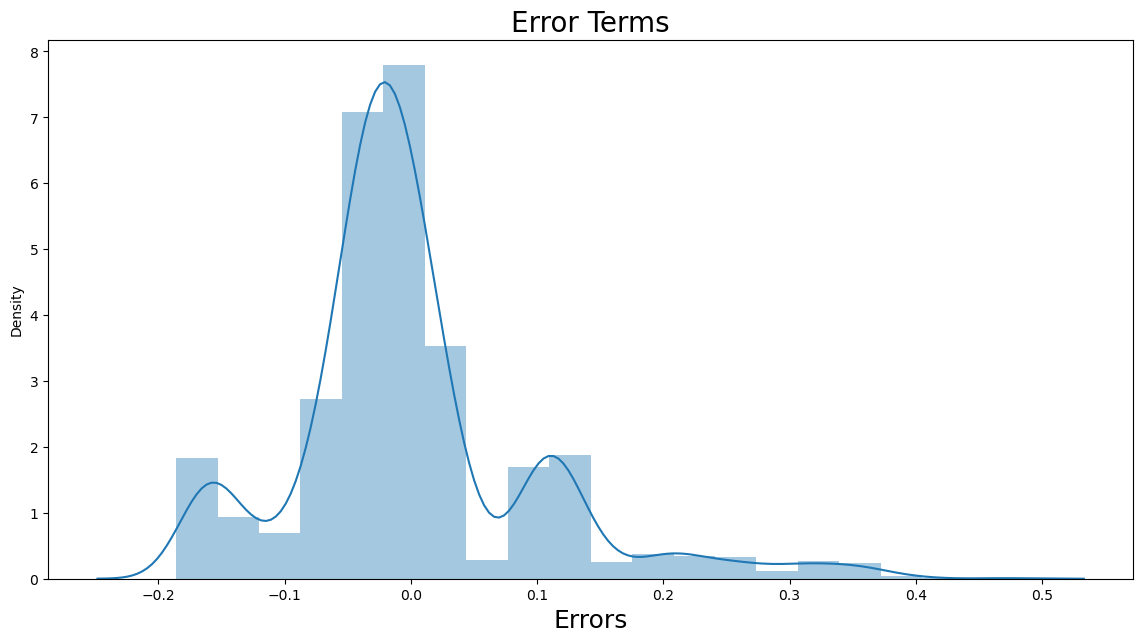

In [80]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

In [82]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
2484,52,0,30.875,0,0,0,23045.56616
1426,24,0,26.600,0,0,0,3046.06200
257,38,0,40.150,0,0,2,5400.98050
2133,19,1,21.755,0,0,1,1627.28245
2155,38,0,19.475,2,0,1,6933.24225


In [83]:
#Create a list of numeric variables
num_vars=num_vars=['age','bmi','charges','children','region']

#Fit on data
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()


,age,sex,bmi,children,smoker,region,charges
2484,0.739130,0,0.393122,0.0,0,0.000000,0.356499
1426,0.130435,0,0.273592,0.0,0,0.000000,0.031073
257,0.434783,0,0.652454,0.0,0,0.666667,0.069392
2133,0.021739,1,0.138124,0.0,0,0.333333,0.007987
2155,0.434783,0,0.074374,0.4,0,0.333333,0.094324


In [84]:
#Dividing into X_test and y_test
y_test = df_test.pop('charges')
X_test = df_test
X_test.describe()

,age,sex,bmi,children,smoker,region
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,0.448374,0.497297,0.374564,0.214054,0.194595,0.481081
std,0.304608,0.500444,0.164690,0.234599,0.396245,0.362437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.000000,0.260310,0.000000,0.000000,0.000000
50%,0.456522,0.000000,0.366559,0.200000,0.000000,0.333333
75%,0.695652,1.000000,0.478121,0.400000,0.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
X_train_new1.columns

Index(['age', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [86]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new1.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()


,const,age,bmi,children,smoker,region
2484,1.0,0.739130,0.393122,0.0,0,0.000000
1426,1.0,0.130435,0.273592,0.0,0,0.000000
257,1.0,0.434783,0.652454,0.0,0,0.666667
2133,1.0,0.021739,0.138124,0.0,0,0.333333
2155,1.0,0.434783,0.074374,0.4,0,0.333333


In [87]:
# Making predictions
y_pred = lm1.predict(X_test_new1)

In [88]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7299163164695776

In [89]:
#Adjusted R^2

#n =sample size , p = number of independent variables
n = X_test.shape[0]
p = X_test.shape[1]


Adj_r2=1-(1-0.75783003115855)*(n-1)/(n-p-1)
print(Adj_r2)


0.755178535149337


In [90]:
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['age','bmi','charges','children','region']

#Fit on data
df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0.0,1,1.000000,0.251611
1,0.000000,1,0.479150,0.2,0,0.666667,0.009636
2,0.217391,1,0.458434,0.6,0,0.666667,0.053115
3,0.326087,1,0.181464,0.0,0,0.333333,0.333010
4,0.304348,1,0.347592,0.0,0,0.333333,0.043816


In [91]:
Y=df.pop('charges')
X=df

In [92]:
X.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0,0.321227,0.0,1,1.000000
1,0.000000,1,0.479150,0.2,0,0.666667
2,0.217391,1,0.458434,0.6,0,0.666667
3,0.326087,1,0.181464,0.0,0,0.333333
4,0.304348,1,0.347592,0.0,0,0.333333


In [93]:
Y.head()

0    0.251611
1    0.009636
2    0.053115
3    0.333010
4    0.043816
Name: charges, dtype: float64

In [94]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [96]:
Lin_reg = LinearRegression()

In [97]:
Lin_reg.fit(X_train,Y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(X_test,Y_test))

-0.052865389426102055
[ 1.92111065e-01 -8.95404570e-06  1.92387183e-01  4.47988948e-02
  3.77103364e-01 -1.34275913e-02]
0.7291350811078192
